#  Logistic regression analysis for advertising dataset 

In [2]:
import numpy as  np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

In [3]:
ad = pd.read_csv('D:\\learning\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression\\advertising.csv')

In [4]:
ad.head(3)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


## Exploratory Data Analysis¶


In [5]:
ad1 = ad[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Clicked on Ad']]


D:\learning\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\learning\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\learning\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\learning\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


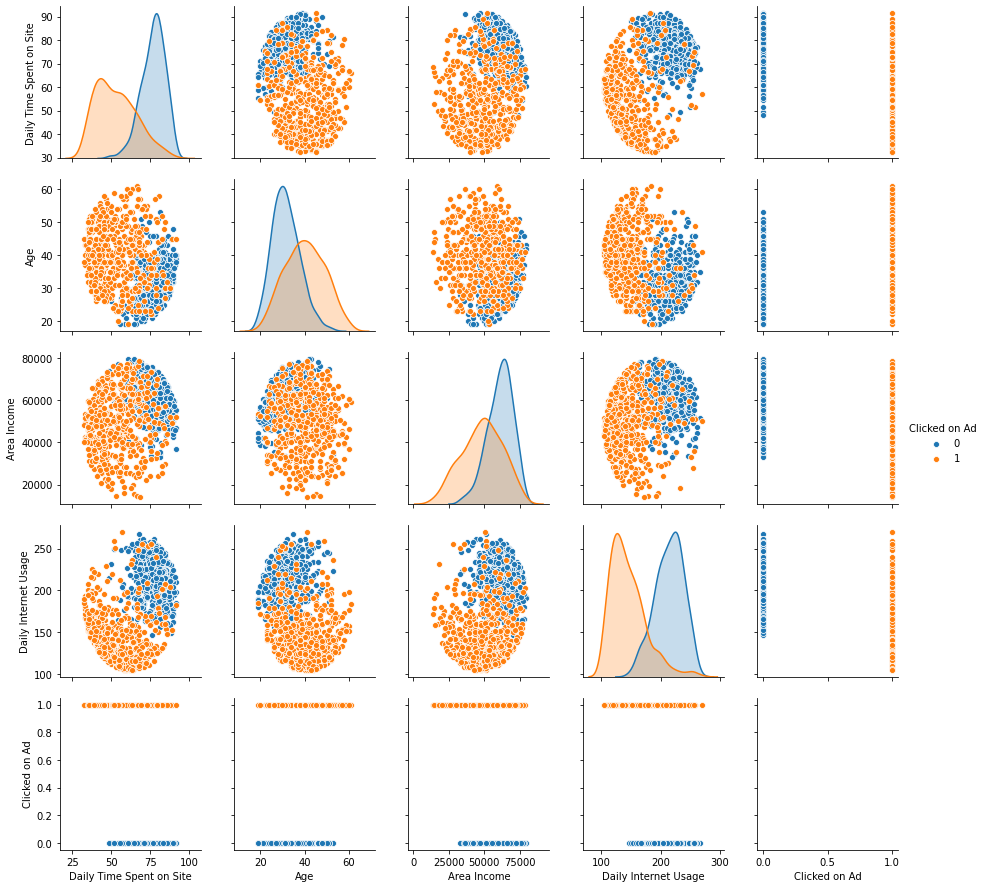

In [6]:
sns.pairplot(ad1,hue='Clicked on Ad')
# gives us an overall idea of the data through plots

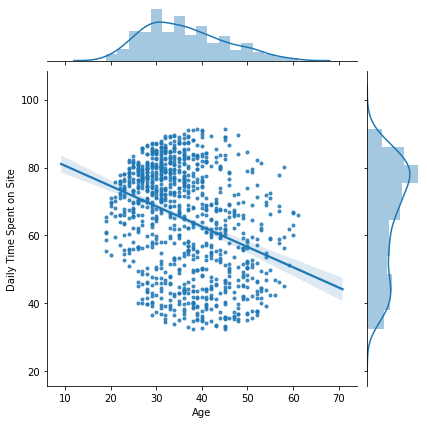

In [7]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad,kind='reg',marker='.')
#Inference
#so as Age and Time spent on Site seem to be inversely proportional.
#People from 25 to 30 tend to use the site more 
#Most people spent about 75 to 80 minutes on the site

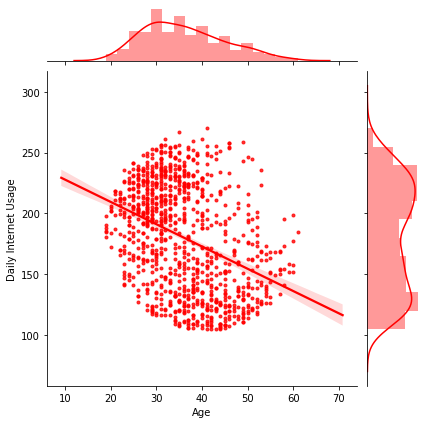

In [8]:
sns.jointplot(x='Age',y='Daily Internet Usage',data=ad,kind='reg',marker='.',color='red')
#Inference
#so as Age and Time spent on Site seem to be directly proportional.
#People from 27 to 32 tend to used lot of data 

## Data Cleaning


In [9]:
ad.head(3)
#Lets make convert the Timestamp into categorical values of two columns (workday or holiday) and (AM or PM) 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [10]:
def weekday(par): #to split the date from datetime
    date , time = par.split(' ')
    y,m,d = map(int,date.split('-'))
    h,mn,s = map(int,time.split(':'))
    obj = dt.datetime(y,m,d,h,mn,s)
    weekday = obj.strftime('%A')
    if(weekday == 'Sunday' or weekday == 'Saturday'):
        week = 'workday'
    else:
        week = 'holiday'
    return(week)
def ampm(par): # to split Time from datetime
    date , time = par.split(' ')
    y,m,d = map(int,date.split('-'))
    h,mn,s = map(int,time.split(':'))
    obj = dt.datetime(y,m,d,h,mn,s)
    weekday = obj.strftime('%A')
    ampm = obj.strftime('%p')
    return(ampm)

In [11]:
wh = ad['Timestamp'].apply(weekday)
ap = ad['Timestamp'].apply(ampm)

In [12]:
Timestamp = pd.DataFrame({'weekday' : wh,
              'ampm' : ap})

In [13]:
ampm = pd.get_dummies(Timestamp['ampm'],drop_first=True)

In [14]:
ampm.head(3)
#now we have the AM or PM as a categorical value 0 for AM and 1 for PM 

,PM
0,0
1,0
2,1


In [15]:
weekday = pd.get_dummies(Timestamp['weekday'],drop_first=True)

In [16]:
weekday.head(3)
#now we have classified working day as 1 and holiday as 0

,workday
0,1
1,0
2,1


In [17]:
ad.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1,inplace=True)
#remove unnecessary columns

In [18]:
ad = pd.concat([ad,weekday,ampm],axis=1)
#concat all the columns 

In [19]:
ad.head(3)
#now we have a classification dataset

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,workday,PM
0,68.95,35,61833.90,256.09,0,0,1,0
1,80.23,31,68441.85,193.77,1,0,0,0
2,69.47,26,59785.94,236.50,0,0,1,1


## Create Model


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = ad.drop(['Clicked on Ad'],axis=1)
y = ad['Clicked on Ad']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression as lr

In [24]:
reg = lr().fit(X_train,y_train)

D:\learning\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
reg.coef_

array([[-5.22054420e-02,  2.53830961e-01, -1.72483790e-05,
        -2.66554213e-02,  1.77842117e-02,  2.70700056e-02,
         4.22374102e-02]])

In [26]:
pd.DataFrame(data=reg.coef_.reshape(-1,1),index=X.columns,columns=['coeff'])

,coeff
Daily Time Spent on Site,-0.052205
Age,0.253831
Area Income,-0.000017
Daily Internet Usage,-0.026655
Male,0.017784
workday,0.027070
PM,0.042237


## Predict

In [27]:
y_pred = reg.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix


In [29]:
cm = confusion_matrix(y_test,y_pred)


In [30]:
cm


array([[157,   5],
       [ 25, 143]], dtype=int64)

In [31]:
pd.DataFrame(data=np.array((157,143,25,5)).reshape(2,2),index=[['True','False']],columns=[['Negative','Positive']])
# from this we can calculate the Precision , recall , F1 score

,Negative,Positive
True,157,143
False,25,5


## Accuracy


In [32]:
from sklearn.metrics import classification_report


In [33]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.97      0.91       162
           1       0.97      0.85      0.91       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.92      0.91      0.91       330

